In [0]:
import pandas as pd
import numpy as np
import math
import chess
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
data = pd.read_csv('/content/gdrive/My Drive/cse519_project/all_feature.csv')
data = data.drop(columns=["Unnamed: 0"])
for i in range(1,101):
  data = data.drop(columns=[str(i)])
data = pd.DataFrame(data).fillna(0)

In [0]:
data.loc[data['ELO'] >= 2200, 'ELO_RANK'] = 1
data.loc[data['ELO'] < 2200, 'ELO_RANK'] = 2
data.loc[data['ELO'] < 2000, 'ELO_RANK'] = 3
data.loc[data['ELO'] < 1800, 'ELO_RANK'] = 4
data.loc[data['ELO'] < 1600, 'ELO_RANK'] = 5

In [0]:
data.loc[data['ELO'] >= 2000, 'ELO_RANK'] = 1
data.loc[data['ELO'] < 2000, 'ELO_RANK'] = 2
data.loc[data['ELO'] < 1700, 'ELO_RANK'] = 3
data.loc[data['ELO'] < 1350, 'ELO_RANK'] = 4
data.loc[data['ELO'] < 1250, 'ELO_RANK'] = 5

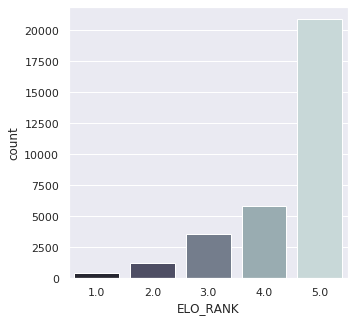

In [54]:
sns.set()
plt.figure(figsize=(5,5))

sns.countplot(data['ELO_RANK'], palette="bone")
plt.show()

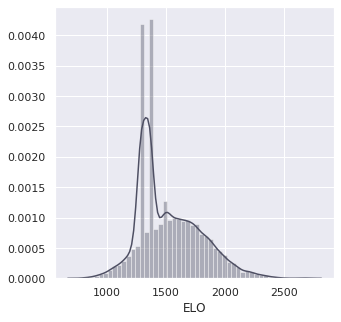

In [48]:
sns.set()
plt.figure(figsize=(5,5))

sns.distplot(data['ELO'], color ="#4e4f63")
plt.show()

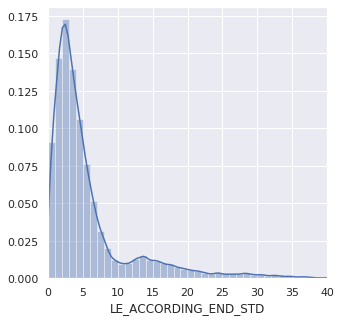

In [0]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['LE_ACCORDING_END_STD'])
plt.xlim((0,40))
plt.show()

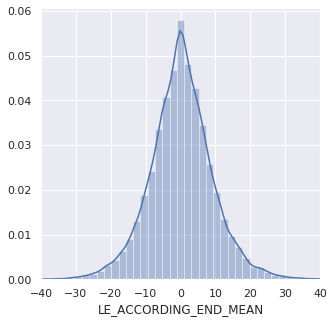

In [0]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['LE_ACCORDING_END_MEAN'])
plt.xlim((-40,40))
plt.show()

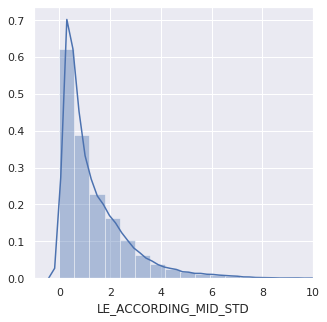

In [0]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['LE_ACCORDING_MID_STD'])
plt.xlim((-1,10))
plt.show()

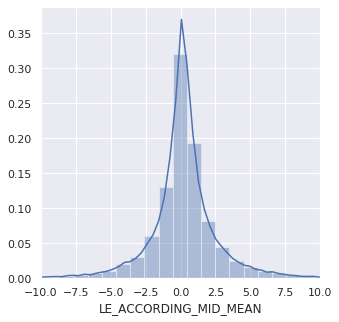

In [0]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['LE_ACCORDING_MID_MEAN'])
plt.xlim((-10,10))
plt.show()

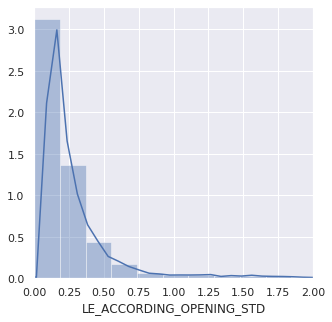

In [0]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['LE_ACCORDING_OPENING_STD'])
plt.xlim((0,2))
plt.show()

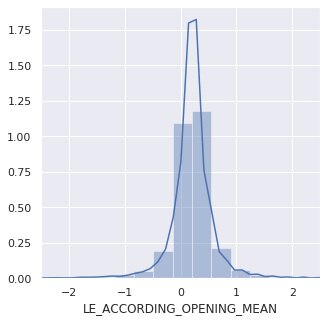

In [0]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['LE_ACCORDING_OPENING_MEAN'])
plt.xlim((-2.5,2.5))
plt.show()

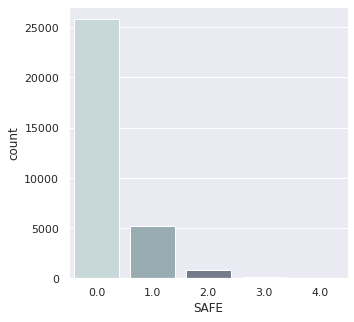

In [0]:
sns.set()
plt.figure(figsize=(5,5))
sns.countplot(data['SAFE'], palette="bone_r")
plt.show()

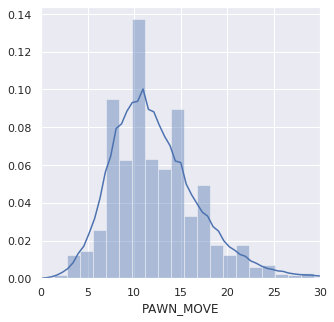

In [0]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['PAWN_MOVE'])
plt.xlim((0,30))
plt.show()

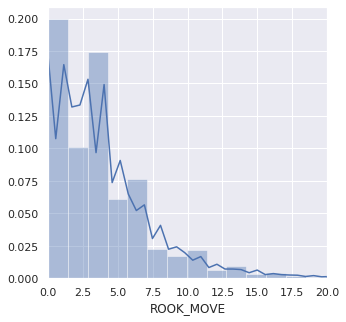

In [0]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['ROOK_MOVE'])
plt.xlim((0,20))
plt.show()

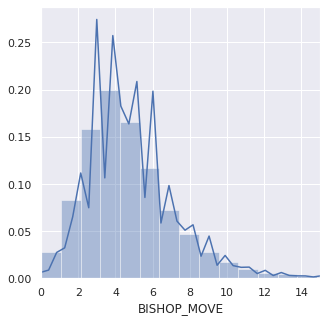

In [0]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['BISHOP_MOVE'])
plt.xlim((0,15))
plt.show()

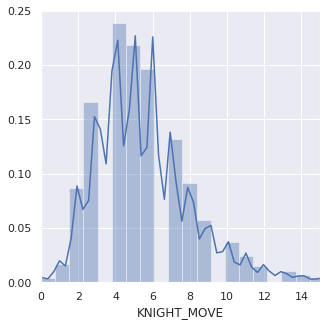

In [0]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['KNIGHT_MOVE'])
plt.xlim((0,15))
plt.show()

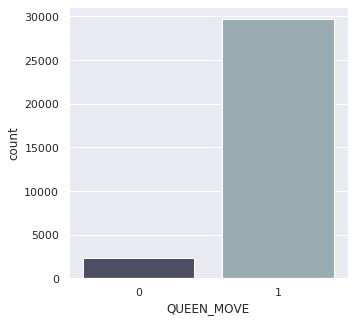

In [0]:
sns.set()
plt.figure(figsize=(5,5))
sns.countplot(data['QUEEN_MOVE'], palette="bone")
plt.show()

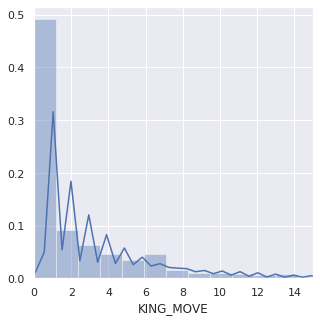

In [0]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['KING_MOVE'])
plt.xlim((0,15))
plt.show()

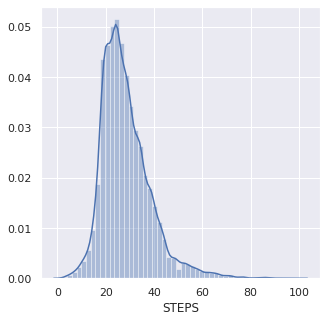

In [0]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['STEPS'])
plt.show()

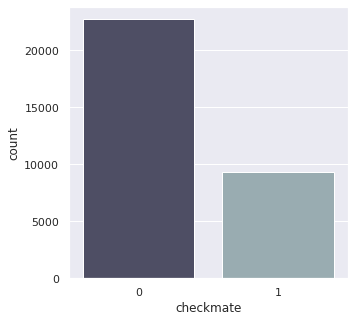

In [0]:
sns.set()
plt.figure(figsize=(5,5))
sns.countplot(data['checkmate'], palette="bone")
plt.show()

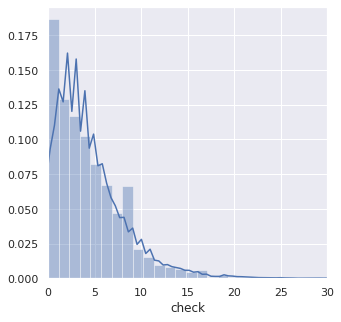

In [0]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['check'])
plt.xlim((0,30))
plt.show()

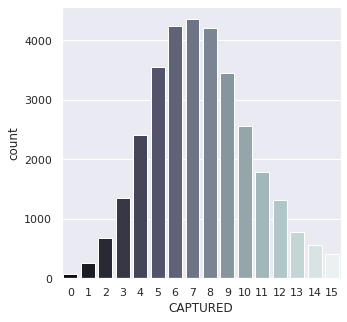

In [0]:
sns.set()
plt.figure(figsize=(5,5))
sns.countplot(data['CAPTURED'], palette="bone")
plt.show()

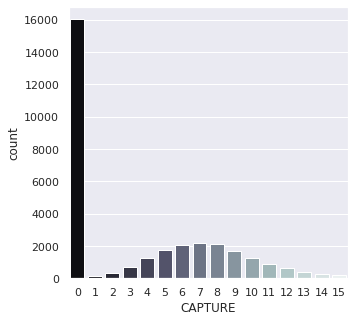

In [0]:
sns.set()
plt.figure(figsize=(5,5))
sns.countplot(data['CAPTURE'], palette="bone")
plt.show()

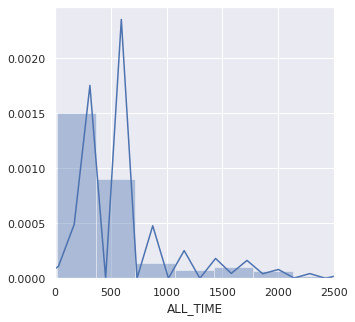

In [0]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['ALL_TIME'])
plt.xlim((0,2500))
plt.show()

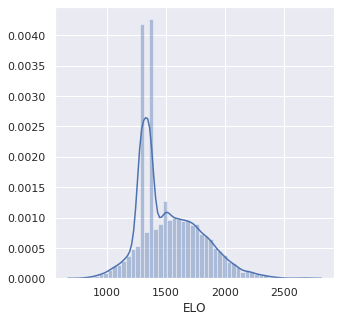

In [0]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['ELO'])
plt.show()

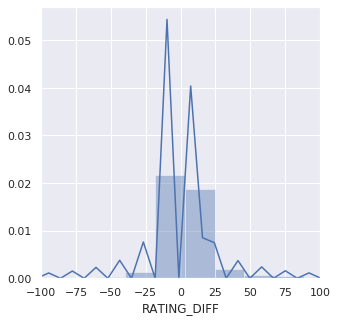

In [0]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['RATING_DIFF'])
plt.xlim((-100,100))
plt.show()

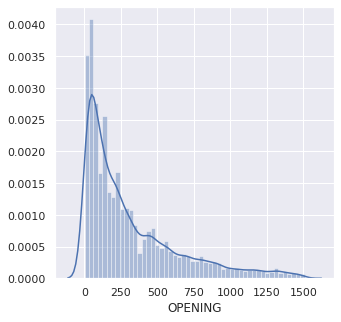

In [0]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['OPENING'])
plt.show()

In [61]:
data.head(1)

,GAME_TYPE,RESULT,UTC_DATE,UTC_TIME,ELO,RATING_DIFF,ECO,OPENING,TIME_CONTROL,TERMINATION,RECORD,LOCAL_EVAL,CLOCK,TRANSCRIPT_ALL,FINAL_POSITION,FINAL_POSITION_MATRIX,FIXED_TIME,INCREMENT,ALL_TIME,CAPTURE,CAPTURED,Q,N,B,R,P,q,n,b,r,p,check,variant_win,checkmate,insufficient_material,repetition,stalemate,TRANSCRIPT,COLOR,GAME_LENGTH,ELO_RANK,STEPS,KING_MOVE,QUEEN_MOVE,KNIGHT_MOVE,BISHOP_MOVE,ROOK_MOVE,PAWN_MOVE,SAFE,DRAW,KING_CASTLE,QUEEN_CASTLE,PROMOTION_COUNT,PROMOTION_MATERIAL,LE_ACCORDING_OPENING_MEAN,LE_ACCORDING_OPENING_MODE,LE_ACCORDING_OPENING_STD,LE_ACCORDING_MID_MEAN,LE_ACCORDING_MID_MODE,LE_ACCORDING_MID_STD,LE_ACCORDING_END_MEAN,LE_ACCORDING_END_MODE,LE_ACCORDING_END_STD,TIME_PER_STEP
0,1,1.0,2017.03.31,22:00:02,2207,20,A74,1,600+0,1,1. d4 { [%eval 0.27] [%clk 0:05:00] } 1... Nf6...,"[0.27, 0.25, 0.47, 0.47, 0.49, 0.48, 0.52, 0.4...","[300, 299, 298, 296, 295, 293, 279, 275, 273, ...","['d4', 'Nf6', 'c4', 'c5', 'd5', 'e6', 'Nc3', '...",. . b q r k . .\n. . . . . . b .\np . . r . p ...,[['.' '.' 'b' 'q' 'r' 'k' '.' '.']\n ['.' '.' ...,600,0,600,5,6,1,0,2,2,4,1,0,2,2,5,1,0,0,0,0,0,"['d4', 'c4', 'd5', 'Nc3', 'cxd5', 'e4', 'Nf3',...",1,166,1.0,28,0,1,7,3,1,16,1.0,0,8,0,0,0,0.39,"ModeResult(mode=array([0.47]), count=array([2]))",0.106583,0.401818,"ModeResult(mode=array([0.]), count=array([2]))",0.323779,0.788333,"ModeResult(mode=array([-0.25]), count=array([2]))",2.969786,"[1, 1, 2, 1, 2, 14, 4, 2, 1, 3, 2, 4, 1, 2, 2,..."


In [0]:
datac = data[['GAME_TYPE', 'RESULT', 'ELO','ELO_RANK', 'RATING_DIFF', 'OPENING',
               'TERMINATION', 'ALL_TIME',
               'CAPTURE', 'CAPTURED', 'STEPS','SAFE']]

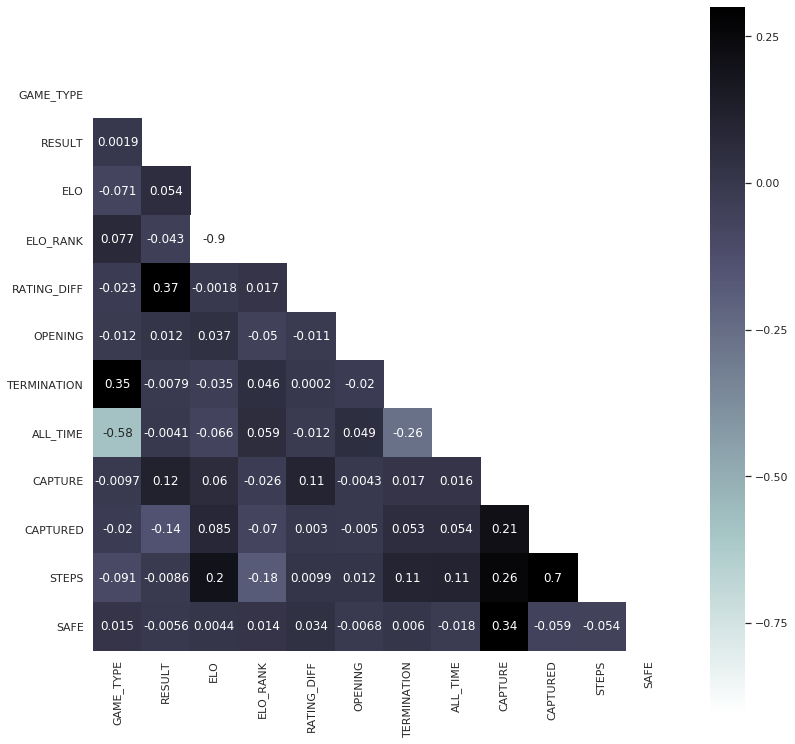

In [70]:
plt.figure(figsize=(13,13))
corr_matrix = datac.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  p2 = sns.heatmap(corr_matrix, mask=mask, vmax=0.3, square=True, cmap="bone_r",annot=True)